In [ ]:
#učitavanje svih neophodnih biblioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, recall_score

In [ ]:
#ucitavanje podataka u DataFrame
data=pd.read_csv('drive/MyDrive/Baza_Dom2-20220104/recipes.csv');
data

,Unnamed: 0,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,flour,eggs,black pepper,chicken,tomatoes,garlic cloves,soy sauce,onion,cheese,lemon,cream,milk,ground black pepper,ginger,vinegar,vegetable oil,unsalted butter,cilantro,sesame,green onions,chicken broth,lemon juice,brown sugar,kosher salt,carrots,sesame oil,parsley,red pepper,bell pepper,...,paprika,pepper flakes,beef,sesame seeds,granulated sugar,spinach,red pepper flakes,cabbage,ground cinnamon,skinless chicken breasts,white pepper,boneless skinless chicken breasts,mozzarella,canola,freshly ground pepper,ground beef,feta cheese,canola oil,vanilla,leaf parsley,avocado,green bell pepper,mint,flat leaf parsley,chocolate,olives,rosemary,coconut milk,mozzarella cheese,broth,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise,country
0,450,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
1,11584,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
2,4645,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
3,11074,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
4,4783,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,greek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10561,4120,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
10562,2252,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,japanese
10563,5823,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
10564,10938,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
#Potrebno je ibaciti Unamed0 kolonu 
data.drop('Unnamed: 0',axis=1,inplace=True)


In [ ]:
data.head()

,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,flour,eggs,black pepper,chicken,tomatoes,garlic cloves,soy sauce,onion,cheese,lemon,cream,milk,ground black pepper,ginger,vinegar,vegetable oil,unsalted butter,cilantro,sesame,green onions,chicken broth,lemon juice,brown sugar,kosher salt,carrots,sesame oil,parsley,red pepper,bell pepper,starch,...,paprika,pepper flakes,beef,sesame seeds,granulated sugar,spinach,red pepper flakes,cabbage,ground cinnamon,skinless chicken breasts,white pepper,boneless skinless chicken breasts,mozzarella,canola,freshly ground pepper,ground beef,feta cheese,canola oil,vanilla,leaf parsley,avocado,green bell pepper,mint,flat leaf parsley,chocolate,olives,rosemary,coconut milk,mozzarella cheese,broth,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise,country
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
2,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,greek


In [ ]:
#provera nedostajucih podataka
print('broj nedostajucih podataka je ',data.isna().sum().sum())

broj nedostajucih podataka je  0


In [ ]:
X=data.iloc[:,0:-1].copy()
y=data.iloc[:,-1].copy()
print(y.unique())#provara koliko ima razlicitih drzava
X.head()

['southern_us' 'french' 'greek' 'mexican' 'italian' 'japanese' 'chinese'
 'thai' 'british']


,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,flour,eggs,black pepper,chicken,tomatoes,garlic cloves,soy sauce,onion,cheese,lemon,cream,milk,ground black pepper,ginger,vinegar,vegetable oil,unsalted butter,cilantro,sesame,green onions,chicken broth,lemon juice,brown sugar,kosher salt,carrots,sesame oil,parsley,red pepper,bell pepper,starch,...,jalapeno chilies,paprika,pepper flakes,beef,sesame seeds,granulated sugar,spinach,red pepper flakes,cabbage,ground cinnamon,skinless chicken breasts,white pepper,boneless skinless chicken breasts,mozzarella,canola,freshly ground pepper,ground beef,feta cheese,canola oil,vanilla,leaf parsley,avocado,green bell pepper,mint,flat leaf parsley,chocolate,olives,rosemary,coconut milk,mozzarella cheese,broth,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Provera koliko uzoraka ima u svakoj od klasa
y.groupby(by=y).count()
#moze se uociti da je brojnost sauthern _us mnogo veca od ostalih
#dok je brojnost za british i za greek mnogo manja od ostalih
#odnosno neravnomerna rasporedjenost uzoraka po klasama je izrazena i izazivace  probleme
#koje je nophodno resiti primenom razlicitih metoda

country
british         509
chinese        1291
french         1565
greek           587
italian        1670
japanese        755
mexican        1274
southern_us    2303
thai            612
Name: country, dtype: int64

In [ ]:
mexican=data[data['country']=='mexican']
mexican

,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,flour,eggs,black pepper,chicken,tomatoes,garlic cloves,soy sauce,onion,cheese,lemon,cream,milk,ground black pepper,ginger,vinegar,vegetable oil,unsalted butter,cilantro,sesame,green onions,chicken broth,lemon juice,brown sugar,kosher salt,carrots,sesame oil,parsley,red pepper,bell pepper,starch,...,paprika,pepper flakes,beef,sesame seeds,granulated sugar,spinach,red pepper flakes,cabbage,ground cinnamon,skinless chicken breasts,white pepper,boneless skinless chicken breasts,mozzarella,canola,freshly ground pepper,ground beef,feta cheese,canola oil,vanilla,leaf parsley,avocado,green bell pepper,mint,flat leaf parsley,chocolate,olives,rosemary,coconut milk,mozzarella cheese,broth,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise,country
6,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
8,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
13,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
17,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10543,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
10545,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
10552,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
10560,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
mean_data = data.groupby('country').mean()
mean_data

,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,flour,eggs,black pepper,chicken,tomatoes,garlic cloves,soy sauce,onion,cheese,lemon,cream,milk,ground black pepper,ginger,vinegar,vegetable oil,unsalted butter,cilantro,sesame,green onions,chicken broth,lemon juice,brown sugar,kosher salt,carrots,sesame oil,parsley,red pepper,bell pepper,starch,...,jalapeno chilies,paprika,pepper flakes,beef,sesame seeds,granulated sugar,spinach,red pepper flakes,cabbage,ground cinnamon,skinless chicken breasts,white pepper,boneless skinless chicken breasts,mozzarella,canola,freshly ground pepper,ground beef,feta cheese,canola oil,vanilla,leaf parsley,avocado,green bell pepper,mint,flat leaf parsley,chocolate,olives,rosemary,coconut milk,mozzarella cheese,broth,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
british,0.671906,0.243615,0.145383,0.231827,0.479371,0.603143,0.117878,0.110020,0.239686,0.231827,0.579568,0.396857,0.172888,0.043222,0.039293,0.056974,0.005894,0.078585,0.129666,0.153242,0.306483,0.363458,0.108055,0.072692,0.094303,0.088409,0.269155,0.009823,0.000000,0.013752,0.013752,0.060904,0.137525,0.090373,0.102161,0.000000,0.064833,0.007859,0.005894,0.053045,...,0.001965,0.033399,0.003929,0.166994,0.000000,0.037328,0.007859,0.001965,0.011788,0.064833,0.001965,0.019646,0.001965,0.000000,0.033399,0.017682,0.039293,0.000000,0.033399,0.072692,0.009823,0.000000,0.003929,0.017682,0.009823,0.037328,0.000000,0.037328,0.001965,0.000000,0.039293,0.003929,0.000000,0.027505,0.001965,0.001965,0.025540,0.037328,0.003929,0.009823
chinese,0.450039,0.580170,0.606507,0.323780,0.511232,0.045701,0.850503,0.061193,0.418280,0.382649,0.147173,0.171960,0.123935,0.360186,0.016266,0.178156,0.768397,0.062742,0.008521,0.038730,0.016266,0.015492,0.073586,0.554609,0.334624,0.238575,0.012393,0.092951,0.505035,0.263362,0.123160,0.021689,0.118513,0.075910,0.144074,0.445391,0.006197,0.114640,0.086754,0.364833,...,0.009295,0.004648,0.071263,0.057320,0.109218,0.018590,0.010844,0.068164,0.097599,0.003098,0.074361,0.132455,0.072812,0.000775,0.059644,0.010070,0.013943,0.000775,0.056545,0.002324,0.000775,0.002324,0.027111,0.003873,0.000775,0.001549,0.000775,0.000775,0.003098,0.000775,0.030984,0.014717,0.009295,0.010844,0.044926,0.103021,0.018590,0.014717,0.034082,0.005422
french,0.627476,0.390415,0.324601,0.229393,0.325240,0.451757,0.035783,0.324601,0.191693,0.231949,0.306709,0.231949,0.246645,0.166773,0.140575,0.200639,0.003195,0.101597,0.164217,0.184026,0.253674,0.175719,0.161661,0.019169,0.138019,0.051757,0.230032,0.004473,0.001917,0.021086,0.091374,0.145048,0.038339,0.066454,0.105431,0.000639,0.143770,0.017252,0.036422,0.036422,...,0.000639,0.014696,0.003195,0.058786,0.001278,0.041534,0.017252,0.002556,0.008307,0.026837,0.007029,0.021086,0.007029,0.003834,0.010224,0.046645,0.001278,0.000639,0.009585,0.056869,0.051118,0.000000,0.007029,0.017891,0.050479,0.069010,0.063259,0.046006,0.001278,0.003834,0.063898,0.033866,0.000639,0.033227,0.007668,0.002556,0.020447,0.054952,0.023642,0.021725
greek,0.628620,0.679727,0.522998,0.356048,0.091993,0.124361,0.040886,0.640545,0.219761,0.131175,0.109029,0.129472,0.330494,0.139693,0.398637,0.255537,0.005111,0.274276,0.471891,0.478705,0.051107,0.068143,0.233390,0.006814,0.161840,0.030664,0.037479,0.010221,0.008518,0.061329,0.045997,0.345826,0.003407,0.078365,0.020443,0.000000,0.163543,0.051107,0.086882,0.006814,...,0.001704,0.039182,0.018739,0.054514,0.008518,0.006814,0.107325,0.018739,0.001704,0.063032,0.027257,0.011925,0.027257,0.010221,0.008518,0.030664,0.034072,0.427598,0.008518,0.003407,0.059625,0.006814,0.037479,0.155026,0.056218,0.001704,0.155026,0.061329,0.000000,0.010221,0.020443,0.047700,0.000000,0.030664,0.018739,0.000000,0.013629,0.011925,0.076661,0.015332
italian,0.602395,0.640120,0.544910,0.331737,0.152695,0.227545,0.167665,0.600000,0.207186,0.183234,0.166467,0.158084,0.3023

In [ ]:
mean_data.reindex(['british','chinese','french','greek','italian','japanese','mexican','southern_us','thai'])

,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,flour,eggs,black pepper,chicken,tomatoes,garlic cloves,soy sauce,onion,cheese,lemon,cream,milk,ground black pepper,ginger,vinegar,vegetable oil,unsalted butter,cilantro,sesame,green onions,chicken broth,lemon juice,brown sugar,kosher salt,carrots,sesame oil,parsley,red pepper,bell pepper,starch,...,jalapeno chilies,paprika,pepper flakes,beef,sesame seeds,granulated sugar,spinach,red pepper flakes,cabbage,ground cinnamon,skinless chicken breasts,white pepper,boneless skinless chicken breasts,mozzarella,canola,freshly ground pepper,ground beef,feta cheese,canola oil,vanilla,leaf parsley,avocado,green bell pepper,mint,flat leaf parsley,chocolate,olives,rosemary,coconut milk,mozzarella cheese,broth,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
british,0.671906,0.243615,0.145383,0.231827,0.479371,0.603143,0.117878,0.110020,0.239686,0.231827,0.579568,0.396857,0.172888,0.043222,0.039293,0.056974,0.005894,0.078585,0.129666,0.153242,0.306483,0.363458,0.108055,0.072692,0.094303,0.088409,0.269155,0.009823,0.000000,0.013752,0.013752,0.060904,0.137525,0.090373,0.102161,0.000000,0.064833,0.007859,0.005894,0.053045,...,0.001965,0.033399,0.003929,0.166994,0.000000,0.037328,0.007859,0.001965,0.011788,0.064833,0.001965,0.019646,0.001965,0.000000,0.033399,0.017682,0.039293,0.000000,0.033399,0.072692,0.009823,0.000000,0.003929,0.017682,0.009823,0.037328,0.000000,0.037328,0.001965,0.000000,0.039293,0.003929,0.000000,0.027505,0.001965,0.001965,0.025540,0.037328,0.003929,0.009823
chinese,0.450039,0.580170,0.606507,0.323780,0.511232,0.045701,0.850503,0.061193,0.418280,0.382649,0.147173,0.171960,0.123935,0.360186,0.016266,0.178156,0.768397,0.062742,0.008521,0.038730,0.016266,0.015492,0.073586,0.554609,0.334624,0.238575,0.012393,0.092951,0.505035,0.263362,0.123160,0.021689,0.118513,0.075910,0.144074,0.445391,0.006197,0.114640,0.086754,0.364833,...,0.009295,0.004648,0.071263,0.057320,0.109218,0.018590,0.010844,0.068164,0.097599,0.003098,0.074361,0.132455,0.072812,0.000775,0.059644,0.010070,0.013943,0.000775,0.056545,0.002324,0.000775,0.002324,0.027111,0.003873,0.000775,0.001549,0.000775,0.000775,0.003098,0.000775,0.030984,0.014717,0.009295,0.010844,0.044926,0.103021,0.018590,0.014717,0.034082,0.005422
french,0.627476,0.390415,0.324601,0.229393,0.325240,0.451757,0.035783,0.324601,0.191693,0.231949,0.306709,0.231949,0.246645,0.166773,0.140575,0.200639,0.003195,0.101597,0.164217,0.184026,0.253674,0.175719,0.161661,0.019169,0.138019,0.051757,0.230032,0.004473,0.001917,0.021086,0.091374,0.145048,0.038339,0.066454,0.105431,0.000639,0.143770,0.017252,0.036422,0.036422,...,0.000639,0.014696,0.003195,0.058786,0.001278,0.041534,0.017252,0.002556,0.008307,0.026837,0.007029,0.021086,0.007029,0.003834,0.010224,0.046645,0.001278,0.000639,0.009585,0.056869,0.051118,0.000000,0.007029,0.017891,0.050479,0.069010,0.063259,0.046006,0.001278,0.003834,0.063898,0.033866,0.000639,0.033227,0.007668,0.002556,0.020447,0.054952,0.023642,0.021725
greek,0.628620,0.679727,0.522998,0.356048,0.091993,0.124361,0.040886,0.640545,0.219761,0.131175,0.109029,0.129472,0.330494,0.139693,0.398637,0.255537,0.005111,0.274276,0.471891,0.478705,0.051107,0.068143,0.233390,0.006814,0.161840,0.030664,0.037479,0.010221,0.008518,0.061329,0.045997,0.345826,0.003407,0.078365,0.020443,0.000000,0.163543,0.051107,0.086882,0.006814,...,0.001704,0.039182,0.018739,0.054514,0.008518,0.006814,0.107325,0.018739,0.001704,0.063032,0.027257,0.011925,0.027257,0.010221,0.008518,0.030664,0.034072,0.427598,0.008518,0.003407,0.059625,0.006814,0.037479,0.155026,0.056218,0.001704,0.155026,0.061329,0.000000,0.010221,0.020443,0.047700,0.000000,0.030664,0.018739,0.000000,0.013629,0.011925,0.076661,0.015332
italian,0.602395,0.640120,0.544910,0.331737,0.152695,0.227545,0.167665,0.600000,0.207186,0.183234,0.166467,0.158084,0.3023

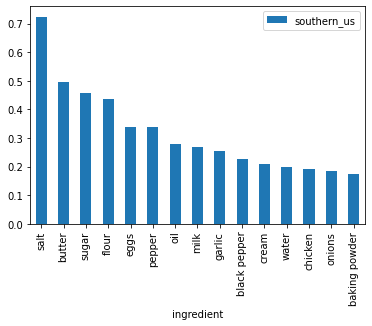

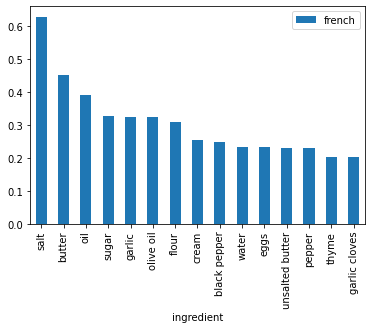

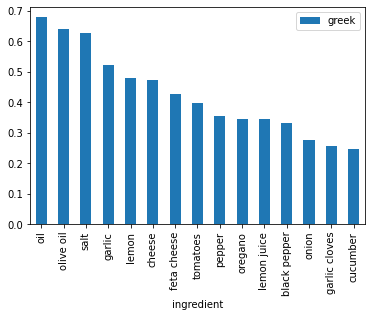

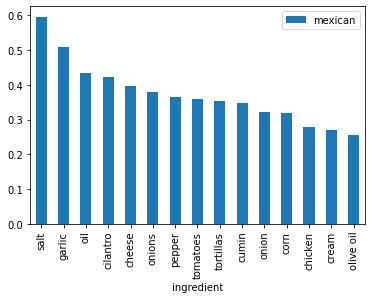

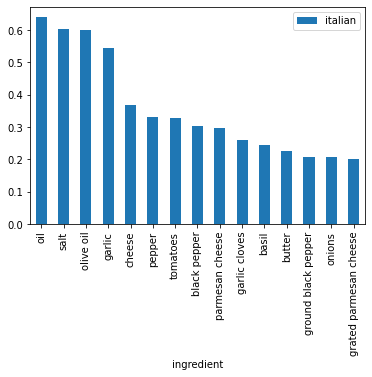

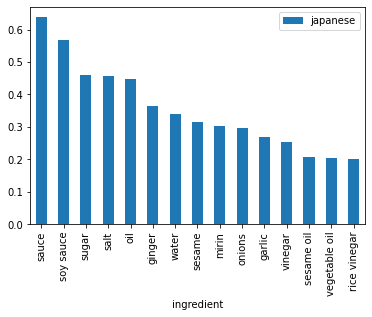

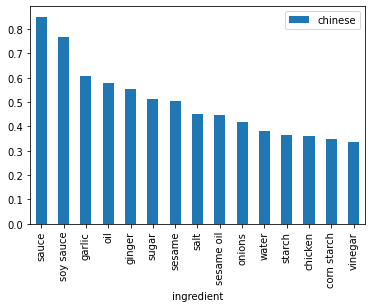

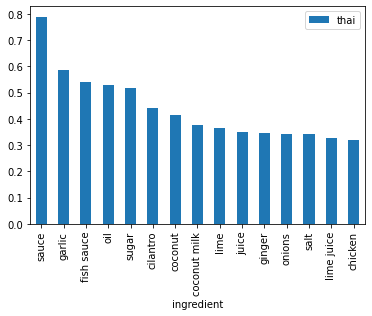

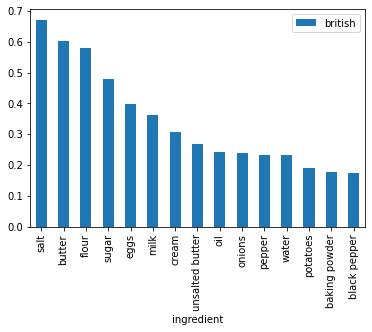

In [ ]:
country_list = data['country'].unique()

for i in range(0, len(country_list)):
    country=country_list[i]
    sorted_by = mean_data.sort_values(by=[country], axis=1, ascending=False)
    sorted_by = sorted_by[sorted_by.index.isin([country])].T.iloc[0:15]
    sorted_by['ingredient'] = sorted_by.index
    sorted_by.plot(x ='ingredient', y=country, kind = 'bar')

In [ ]:
# podela podataka na trening i test
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)

In [ ]:
def tacnost_po_klasi(mat_konf, klase):
    tacnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        tacnost_i.append((TP+TN)/sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' tacnost je: ', tacnost_i[i])
    tacnost_avg = np.mean(tacnost_i)
    return tacnost_avg

In [ ]:
def osetljivost_po_klasi(mat_konf, klase):
    osetljivost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FN = sum(mat_konf[i,j])
        osetljivost_i.append(TP/(TP+FN))
        print('Za klasu ', klase[i], ' osetljivost je: ', osetljivost_i[i])
    osetljivost_avg = np.mean(osetljivost_i)
    return osetljivost_avg

In [ ]:
def specificnost_po_klasi(mat_konf, klase):
    specificnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FN = sum(mat_konf[i,j])
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        FP=sum(sum(mat_konf))-TN-FN-TP
        specificnost_i.append(TN/(TN+FP))
        print('Za klasu ', klase[i], ' specificnost je: ', specificnost_i[i])
    specificnost_avg = np.mean(specificnost_i)
    return specificnost_avg

In [ ]:
def preciznost_po_klasi(mat_konf, klase):
    preciznost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FN = sum(mat_konf[i,j])
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        FP=sum(sum(mat_konf))-TN-FN-TP#######
        preciznost_i.append(TP/(TP+FP))
        print('Za klasu ', klase[i], ' preciznost je: ', preciznost_i[i])
    preciznost_avg = np.mean(preciznost_i)
    return preciznost_avg

## prvo cu uraditi kalsifikaciju na neizbalasniranom skupu podataka

In [ ]:
#prva varijanta je da se zanemari nebalanskiranost medju klasama po broju uzoraka

0.7104100946372239
0.7050473186119873
0.7134742821079205


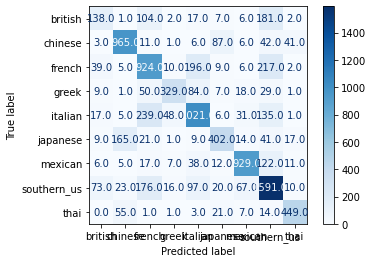

procenat tacno predvidjenih:  0.7096434956357135


In [ ]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
indexes = kf.split(X_tr, y_tr)
acc = []
fin_conf_mat = np.zeros((len(np.unique(y_tr)),len(np.unique(y_tr))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(70,70,70), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    classifier.fit(X_tr.iloc[train_index,:].values, y_tr.iloc[train_index])
    y_pred = classifier.predict(X_tr.iloc[test_index,:].values)
    
    print(accuracy_score(y_tr.iloc[test_index], y_pred))#tacnos za odredjenu iteraciju
    fin_conf_mat += confusion_matrix(y_tr.iloc[test_index], y_pred)

#print('konacna matrica konfuzije: \n', fin_conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='')  
plt.show()

print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))

Moze se uociti u matrici konfuzije da je se kod drzava koje su redje javljaju vece greske napravljena kod ucestalijih klasa.Dok kalse koje su ucestalije imaju vecu tacnost.

In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat,classifier.classes_))
#svi su poprilicno tacni zato sto dominira tn za ameriku francusku kinu itd

Za klasu  british  tacnost je:  0.9499421600588915
Za klasu  chinese  tacnost je:  0.9519402671153644
Za klasu  french  tacnost je:  0.8840046271952887
Za klasu  greek  tacnost je:  0.9700283941529078
Za klasu  italian  tacnost je:  0.9019875907035441
Za klasu  japanese  tacnost je:  0.9530970659375329
Za klasu  mexican  tacnost je:  0.96077400357556
Za klasu  southern_us  tacnost je:  0.8671784625092018
Za klasu  thai  tacnost je:  0.980334420023136
prosecna tacnost je:  0.9354763323634919


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, classifier.classes_))
#bolje je da se odradi osetljivost zato sto je brojnost po klasama razlicita
#zato je bolja ovaj koja pokazuje udeo tacnih predikcija u okviru pojedinacne pozitivne klase

Za klasu  british  osetljivost je:  0.30131004366812225
Za klasu  chinese  osetljivost je:  0.8304647160068847
Za klasu  french  osetljivost je:  0.65625
Za klasu  greek  osetljivost je:  0.6231060606060606
Za klasu  italian  osetljivost je:  0.6793080505655356
Za klasu  japanese  osetljivost je:  0.5920471281296024
Za klasu  mexican  osetljivost je:  0.8099389712292938
Za klasu  southern_us  osetljivost je:  0.7674867342016402
Za klasu  thai  osetljivost je:  0.8148820326678766
prosecna osetljivost je:  0.6749770818972239


**Razmatranja:** Ima 5 drzava koje imaju veci broj uzoraka i 4 drzave koje imaju mnaji broj. Ne bi bio najbolji nacin da se uradi **undersaplimng** za svaku drzavu od tih 5, posto ih je i vise, ali i zato sto bi se time izgubilo mnogo prikupljneih podataka. Neki od nacina koji mi se deluje kao najprikladniji jeste da se Amerika kao kategorija sa najvise uzoraka malo smanji, a da se pritom ostale za drzave koje imaju izrazito mnaji broj uzoraka poveca kolicina uzoraka primenjujuci **upsampling**.Time se nece izbaciti velika kolicina podataka a pritom se nece ubaciti veliki broj kopija.

In [ ]:
rest_ind = y_tr.loc[(y_tr!='southern_us') & (y_tr!='mexican') & (y_tr!='italian') & (y_tr!='french') & (y_tr!='chinese')].index
largest_country_ind = y_tr.loc[(y_tr=='southern_us')|(y_tr=='mexican')|(y_tr=='italian')|(y_tr=='french')|(y_tr=='chinese')].index

X_dupl = X.iloc[rest_ind,:]#za sve vrste koje nisu ni jednoj od 5 drzava uzmi sve kolone
X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
X_upsample = X_duplicated.append(X.iloc[largest_country_ind,:], ignore_index=True)

y_dupl = y.iloc[rest_ind]
y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
y_upsample = y_duplicated.append(y.iloc[largest_country_ind], ignore_index=True)
        
print('original X: ', X_tr.shape)
print('original y: ', y_tr.shape)
print('redukovan X: ', X_upsample.shape)
print('redukovan y: ', y_upsample.shape)
y_upsample.groupby(by=y_upsample).count()

original X:  (9509, 150)
original y:  (9509,)
redukovan X:  (11725, 150)
redukovan y:  (11725,)


country
british         916
chinese        1162
french         1408
greek          1056
italian        1503
japanese       1358
mexican        1147
southern_us    2073
thai           1102
Name: country, dtype: int64

0.735993860322333
0.7377175025588536
0.7459058341862845


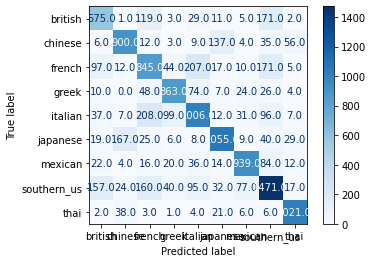

procenat tacno predvidjenih:  0.7398720682302772


In [ ]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
indexes = kf.split(X_upsample, y_upsample)
acc = []
fin_conf_mat = np.zeros((len(np.unique(y_upsample)),len(np.unique(y_upsample))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(70,70,70), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    
    classifier.fit(X_upsample.iloc[train_index,:].values, y_upsample.iloc[train_index])
    y_pred = classifier.predict(X_upsample.iloc[test_index,:].values)
    print(accuracy_score(y_upsample.iloc[test_index], y_pred))
    fin_conf_mat += confusion_matrix(y_upsample.iloc[test_index], y_pred)
#dodatak
#print('micro osetljivost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
#print('konacna matrica konfuzije: \n', fin_conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='')  
plt.show()

print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, classifier.classes_))#znatno se poboljsala osetnljivost

Za klasu  british  osetljivost je:  0.6277292576419214
Za klasu  chinese  osetljivost je:  0.774526678141136
Za klasu  french  osetljivost je:  0.6001420454545454
Za klasu  greek  osetljivost je:  0.8172348484848485
Za klasu  italian  osetljivost je:  0.669328010645376
Za klasu  japanese  osetljivost je:  0.7768777614138439
Za klasu  mexican  osetljivost je:  0.8186573670444638
Za klasu  southern_us  osetljivost je:  0.7095996140858659
Za klasu  thai  osetljivost je:  0.926497277676951
prosecna osetljivost je:  0.7467325400654392


Sada cu uraditi undersapling Juzne US

In [ ]:

US_ind = y_upsample.loc[y_upsample=='southern_us'].index
US_ind_red = US_ind[::2]
rest_ind = y_upsample.loc[y_upsample!='southern_us'].index
keep_ind = np.concatenate((US_ind_red,rest_ind))
y_undersample = y_upsample.copy(deep=True)
X_undersample = X_upsample.copy(deep=True)
for i in range(len(y)):
    if i not in keep_ind:
        y_undersample.drop(i, axis=0, inplace=True)
        X_undersample.drop(i, axis=0, inplace=True)
        
print('original X: ', X_upsample.shape)
print('original y: ', y_upsample.shape)
print('redukovan X: ', X_undersample.shape)
print('redukovan y: ', y_undersample.shape)
y_undersample.groupby(by=y_undersample).count()

original X:  (11725, 150)
original y:  (11725,)
redukovan X:  (10869, 150)
redukovan y:  (10869,)


country
british         916
chinese        1162
french         1408
greek          1056
italian        1503
japanese       1358
mexican        1147
southern_us    1217
thai           1102
Name: country, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7441346950041402


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7502070107645598
0.7071487717361303


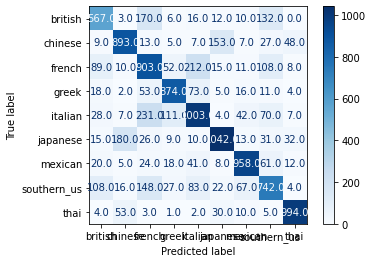

procenat tacno predvidjenih:  0.7338301591682768


In [ ]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
indexes = kf.split(X_undersample, y_undersample)
acc = []
fin_conf_mat = np.zeros((len(np.unique(y_undersample)),len(np.unique(y_undersample))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(70,70,70), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    classifier.fit(X_undersample.iloc[train_index,:].values, y_undersample.iloc[train_index])
    y_pred = classifier.predict(X_undersample.iloc[test_index,:].values)
    print(accuracy_score(y_undersample.iloc[test_index], y_pred))
    fin_conf_mat += confusion_matrix(y_undersample.iloc[test_index], y_pred)

#print('konacna matrica konfuzije: \n', fin_conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='')  
plt.show()

print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, classifier.classes_))

Za klasu  british  osetljivost je:  0.618995633187773
Za klasu  chinese  osetljivost je:  0.7685025817555938
Za klasu  french  osetljivost je:  0.6413352272727273
Za klasu  greek  osetljivost je:  0.8276515151515151
Za klasu  italian  osetljivost je:  0.667332002661344
Za klasu  japanese  osetljivost je:  0.7673048600883653
Za klasu  mexican  osetljivost je:  0.8352223190932868
Za klasu  southern_us  osetljivost je:  0.6096959737058341
Za klasu  thai  osetljivost je:  0.9019963702359347
prosecna osetljivost je:  0.7375596092391528


## Sada cu pokusati sa promenom broja neurona po sloju

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7361302787744963
0.7192934032569693


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7526911399392768


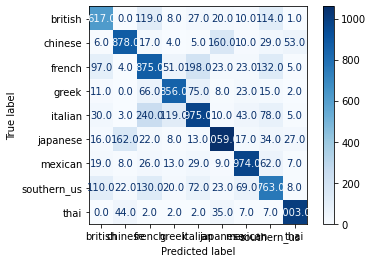

procenat tacno predvidjenih:  0.7360382739902475


In [ ]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
indexes = kf.split(X_undersample, y_undersample)
acc = []
fin_conf_mat = np.zeros((len(np.unique(y_undersample)),len(np.unique(y_undersample))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    classifier.fit(X_undersample.iloc[train_index,:].values, y_undersample.iloc[train_index])
    y_pred = classifier.predict(X_undersample.iloc[test_index,:].values)
    
    print(accuracy_score(y_undersample.iloc[test_index], y_pred))
    fin_conf_mat += confusion_matrix(y_undersample.iloc[test_index], y_pred)

#print('konacna matrica konfuzije: \n', fin_conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='')  
plt.show()

print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, classifier.classes_))

Za klasu  british  osetljivost je:  0.6735807860262009
Za klasu  chinese  osetljivost je:  0.7555938037865749
Za klasu  french  osetljivost je:  0.6214488636363636
Za klasu  greek  osetljivost je:  0.8106060606060606
Za klasu  italian  osetljivost je:  0.6487025948103793
Za klasu  japanese  osetljivost je:  0.7798232695139912
Za klasu  mexican  osetljivost je:  0.8491717523975588
Za klasu  southern_us  osetljivost je:  0.6269515201314708
Za klasu  thai  osetljivost je:  0.9101633393829401
prosecna osetljivost je:  0.7417824433657266


0.7499309964118134


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7637317140491305


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7648357714601159


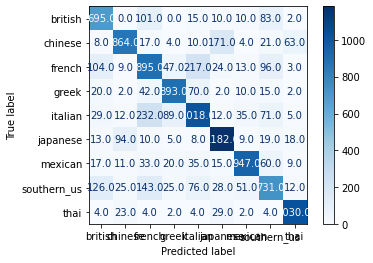

procenat tacno predvidjenih:  0.7594994939736867


In [ ]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
indexes = kf.split(X_undersample, y_undersample)
acc = []
fin_conf_mat = np.zeros((len(np.unique(y_undersample)),len(np.unique(y_undersample))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    classifier.fit(X_undersample.iloc[train_index,:].values, y_undersample.iloc[train_index])
    y_pred = classifier.predict(X_undersample.iloc[test_index,:].values)
    
    print(accuracy_score(y_undersample.iloc[test_index], y_pred))
    fin_conf_mat += confusion_matrix(y_undersample.iloc[test_index], y_pred)

#print('konacna matrica konfuzije: \n', fin_conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='')  
plt.show()

print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, classifier.classes_))

Za klasu  british  osetljivost je:  0.7587336244541485
Za klasu  chinese  osetljivost je:  0.7435456110154905
Za klasu  french  osetljivost je:  0.6356534090909091
Za klasu  greek  osetljivost je:  0.8456439393939394
Za klasu  italian  osetljivost je:  0.6773120425815037
Za klasu  japanese  osetljivost je:  0.8703976435935199
Za klasu  mexican  osetljivost je:  0.8256320836965998
Za klasu  southern_us  osetljivost je:  0.600657354149548
Za klasu  thai  osetljivost je:  0.9346642468239564
prosecna osetljivost je:  0.7658044394221795


###Sada je potrebno testirati klasifikator sa odabranim paramtrima nad test podacima.

[[  9   0  21   1   0   2   0  18   0]
 [  2 109   1   0   0  11   0   4   2]
 [  5   1 106   1  19   2   3  20   0]
 [  2   0   7  33  13   0   1   3   0]
 [  1   1  27   2 120   0   5  11   0]
 [  1  18   5   0   3  39   2   4   4]
 [  1   1   2   0   5   1 101  15   1]
 [  3   3  22   0  11   0   8 183   0]
 [  0  10   1   0   1   0   2   2  45]]


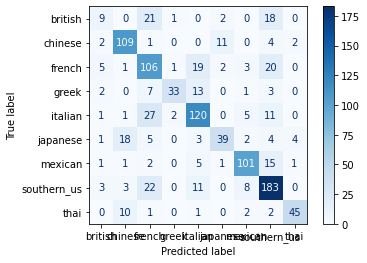

procenat pogodjenih uzoraka:  0.7048249763481551
preciznost mikro:  0.7048249763481551
preciznost makro:  0.7094531040942592
osetljivost mikro:  0.7048249763481551
osetljivost makro:  0.6462518388442019
f mera mikro:  0.7048249763481551
f mera makro:  0.6660498696097786


In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
classifier.fit(X_tr.values, y_tr)
y_pred = classifier.predict(X_te.values)

conf_mat = confusion_matrix(y_te, y_pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_te, y_pred=y_pred, labels=classifier.classes_, cmap=plt.cm.Blues)   
plt.show()

print('procenat pogodjenih uzoraka: ', accuracy_score(y_te, y_pred))
print('preciznost mikro: ', precision_score(y_te, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_te, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_te, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_te, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_te, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_te, y_pred, average='macro'))


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(conf_mat, classifier.classes_))

Za klasu  british  osetljivost je:  0.17647058823529413
Za klasu  chinese  osetljivost je:  0.8449612403100775
Za klasu  french  osetljivost je:  0.6751592356687898
Za klasu  greek  osetljivost je:  0.559322033898305
Za klasu  italian  osetljivost je:  0.718562874251497
Za klasu  japanese  osetljivost je:  0.5131578947368421
Za klasu  mexican  osetljivost je:  0.7952755905511811
Za klasu  southern_us  osetljivost je:  0.7956521739130434
Za klasu  thai  osetljivost je:  0.7377049180327869
prosecna osetljivost je:  0.6462518388442019


In [ ]:
print('prosecna preciznost je: ', preciznost_po_klasi(conf_mat, classifier.classes_))

Za klasu  british  preciznost je:  0.375
Za klasu  chinese  preciznost je:  0.7622377622377622
Za klasu  french  preciznost je:  0.5520833333333334
Za klasu  greek  preciznost je:  0.8918918918918919
Za klasu  italian  preciznost je:  0.6976744186046512
Za klasu  japanese  preciznost je:  0.7090909090909091
Za klasu  mexican  preciznost je:  0.8278688524590164
Za klasu  southern_us  preciznost je:  0.7038461538461539
Za klasu  thai  preciznost je:  0.8653846153846154
prosecna preciznost je:  0.7094531040942592


In [ ]:
print('prosecna specificnost je: ', specificnost_po_klasi(conf_mat, classifier.classes_))

Za klasu  british  specificnost je:  0.9850894632206759
Za klasu  chinese  specificnost je:  0.9633620689655172
Za klasu  french  specificnost je:  0.9044444444444445
Za klasu  greek  specificnost je:  0.9959919839679359
Za klasu  italian  specificnost je:  0.9415730337078652
Za klasu  japanese  specificnost je:  0.9836901121304791
Za klasu  mexican  specificnost je:  0.9774193548387097
Za klasu  southern_us  specificnost je:  0.9068923821039904
Za klasu  thai  specificnost je:  0.9929718875502008
prosecna specificnost je:  0.9612705256588687


In [ ]:
print('trening X: ', X_tr.shape)
print('trening y: ', y_tr.shape)
print('test X: ', X_te.shape)
print('test y: ', y_te.shape)

trening X:  (9509, 150)
trening y:  (9509,)
test X:  (1057, 150)
test y:  (1057,)


In [ ]:
y_te.groupby(by=y_te).count()

country
british         51
chinese        129
french         157
greek           59
italian        167
japanese        76
mexican        127
southern_us    230
thai            61
Name: country, dtype: int64

In [ ]:
y_tr.groupby(by=y_tr).count()

country
british         458
chinese        1162
french         1408
greek           528
italian        1503
japanese        679
mexican        1147
southern_us    2073
thai            551
Name: country, dtype: int64

**Sada cu raditi klasifikaciju kNN**

Sada cu raditi metodom unakrsne validacije sa podelom trening skupa na 3 dela

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


za parametre k= 3  i m= jaccard osetljivost je:  0.6383432562889904  a mat. konf. je:


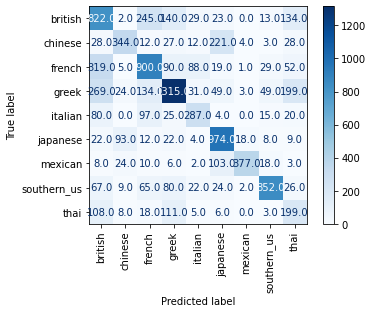

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


za parametre k= 3  i m= matching osetljivost je:  0.5969088027118653  a mat. konf. je:


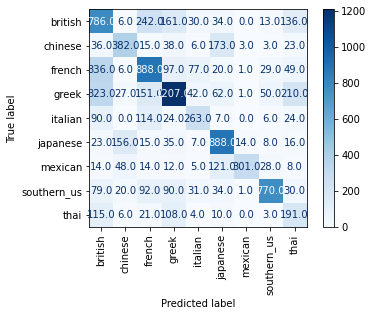

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


za parametre k= 7  i m= jaccard osetljivost je:  0.6718902790870681  a mat. konf. je:


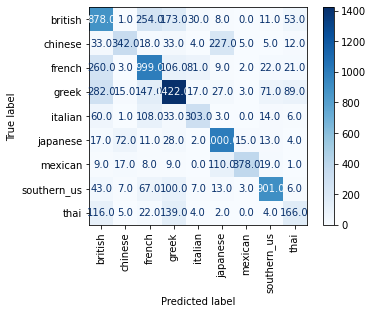

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


za parametre k= 7  i m= matching osetljivost je:  0.634452946674856  a mat. konf. je:


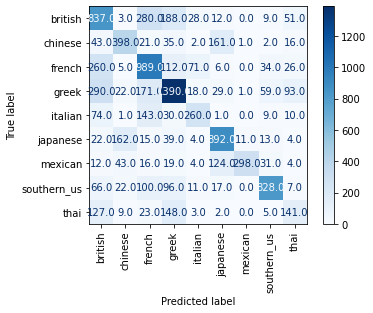

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


za parametre k= 9  i m= jaccard osetljivost je:  0.6728371158691305  a mat. konf. je:


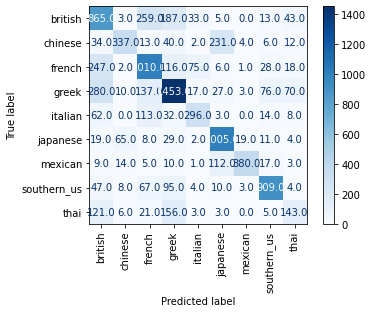

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


za parametre k= 9  i m= matching osetljivost je:  0.6404470688873117  a mat. konf. je:


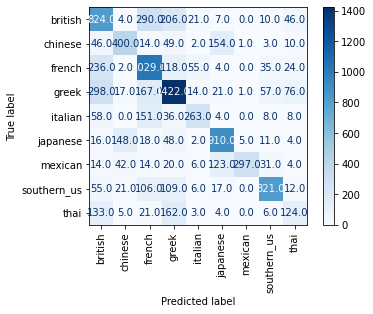

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


za parametre k= 11  i m= jaccard osetljivost je:  0.6774646209550393  a mat. konf. je:


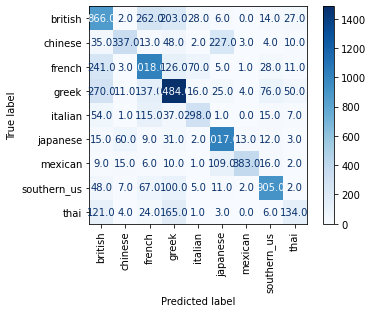

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


za parametre k= 11  i m= matching osetljivost je:  0.6440228169912324  a mat. konf. je:


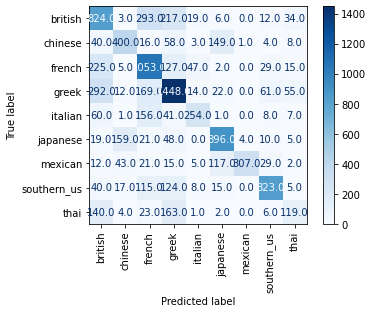

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


za parametre k= 15  i m= jaccard osetljivost je:  0.6833534911516302  a mat. konf. je:


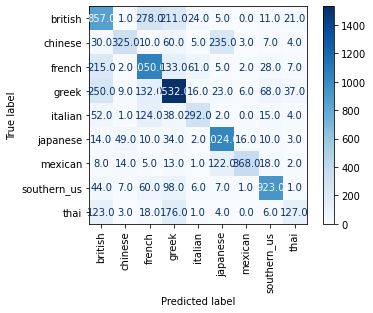

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


za parametre k= 15  i m= matching osetljivost je:  0.6477028216632008  a mat. konf. je:


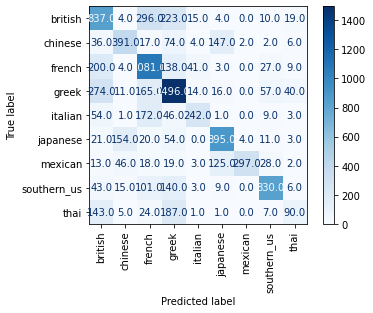

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


za parametre k= 17  i m= jaccard osetljivost je:  0.6841951422810156  a mat. konf. je:


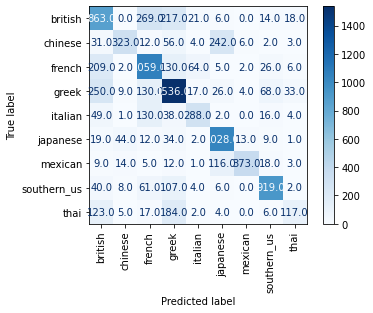

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


za parametre k= 17  i m= matching osetljivost je:  0.6468615355313484  a mat. konf. je:


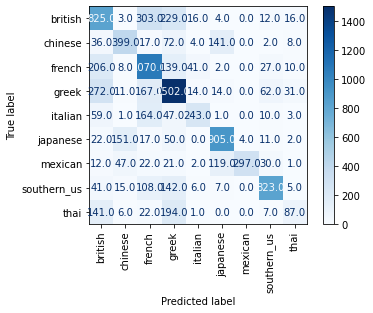

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


za parametre k= 20  i m= jaccard osetljivost je:  0.6811447251717894  a mat. konf. je:


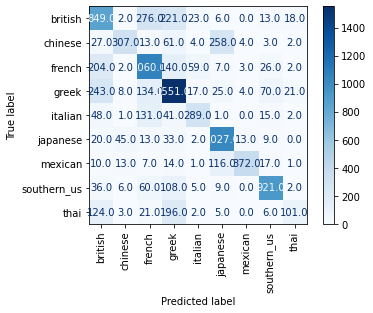

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


za parametre k= 20  i m= matching osetljivost je:  0.6492802082742286  a mat. konf. je:


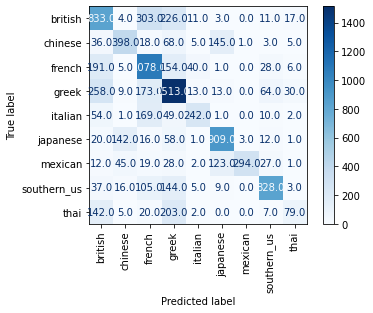

najbolja osetljivost je u iteraciji broj:  10


In [ ]:

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
acc = []
for k in [3, 7, 9, 11, 15,17,20]:
    for m in ['jaccard', 'matching']:
        indexes = kf.split(X_tr, y_tr)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_tr)),len(np.unique(y_tr))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X_tr.iloc[train_index,:], y_tr.iloc[train_index])
            y_pred = classifier.predict(X_tr.iloc[test_index,:])
            acc_tmp.append(recall_score(y_tr.iloc[test_index], y_pred,average='micro'))
            fin_conf_mat += confusion_matrix(y_tr.iloc[test_index], y_pred, labels=y_tr.unique())
        print('za parametre k=', k, ' i m=', m, 'osetljivost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
        #print(fin_conf_mat)

        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        disp.plot(cmap="Blues", values_format='', xticks_rotation=90)  
        plt.show()
        
        
        acc.append(np.mean(acc_tmp))
print('najbolja osetljivost je u iteraciji broj: ', np.argmax(acc))
#za parametre k= 17  i m= jaccard osetljivost je:  0.6841951422810156  a mat. konf. je:

#matching daje losije rezultate

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


za parametre k= 3  i m= kulsinski osetljivost je:  0.6370804975513643  a mat. konf. je:


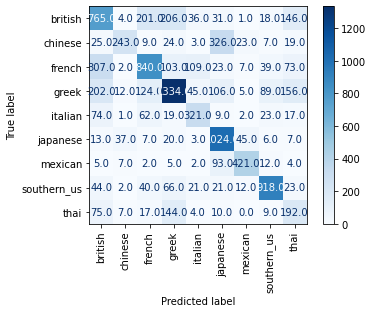

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


za parametre k= 3  i m= dice osetljivost je:  0.6383432562889904  a mat. konf. je:


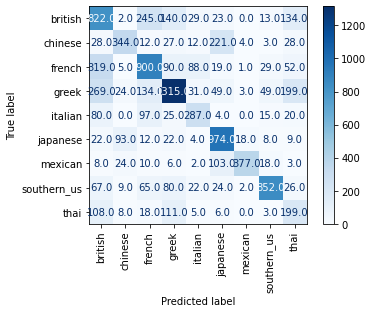

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


za parametre k= 7  i m= kulsinski osetljivost je:  0.6552743304866845  a mat. konf. je:


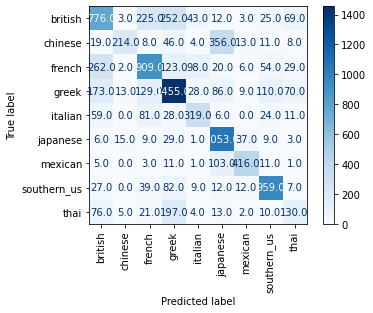

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


za parametre k= 7  i m= dice osetljivost je:  0.6718902790870681  a mat. konf. je:


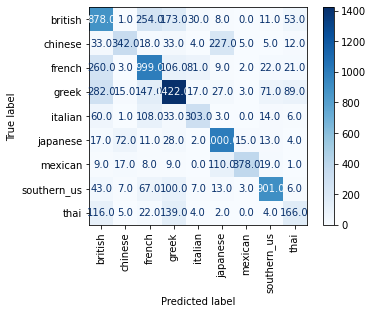

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


za parametre k= 9  i m= kulsinski osetljivost je:  0.659165635548636  a mat. konf. je:


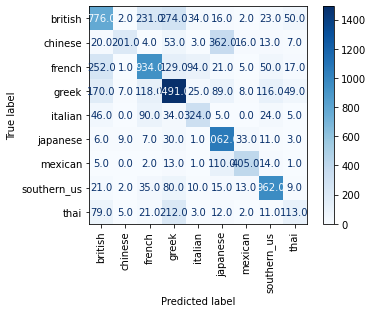

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


za parametre k= 9  i m= dice osetljivost je:  0.6728371158691305  a mat. konf. je:


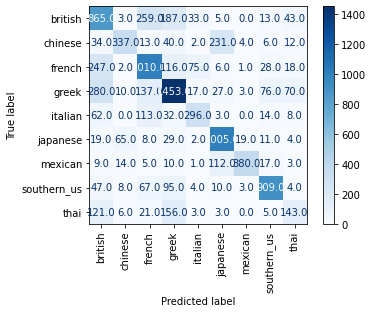

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


za parametre k= 11  i m= kulsinski osetljivost je:  0.6617945468704945  a mat. konf. je:


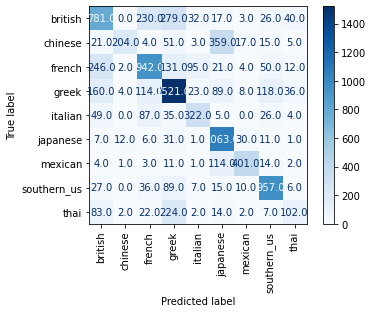

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


za parametre k= 11  i m= dice osetljivost je:  0.6774646209550393  a mat. konf. je:


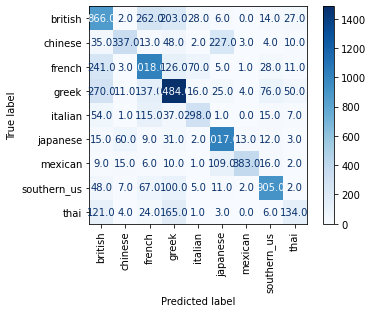

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


za parametre k= 15  i m= kulsinski osetljivost je:  0.6628456402206045  a mat. konf. je:


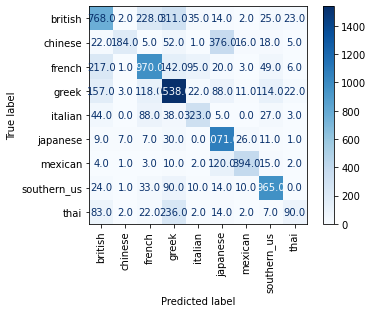

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


za parametre k= 15  i m= dice osetljivost je:  0.6833534911516302  a mat. konf. je:


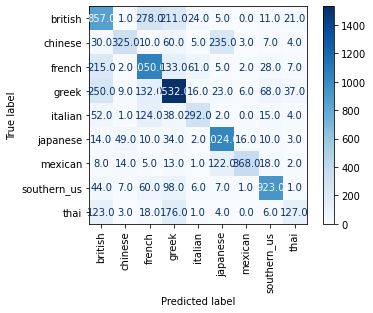

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


za parametre k= 17  i m= kulsinski osetljivost je:  0.6625303818969187  a mat. konf. je:


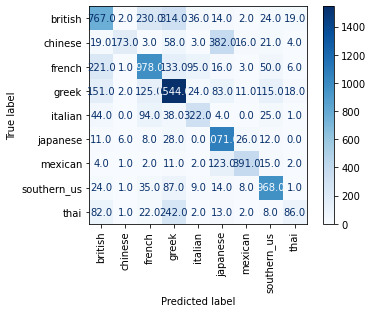

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


za parametre k= 17  i m= dice osetljivost je:  0.6841951422810156  a mat. konf. je:


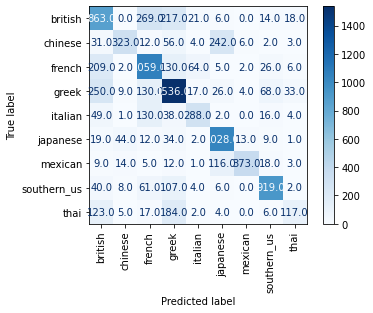

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


za parametre k= 20  i m= kulsinski osetljivost je:  0.6630564760682732  a mat. konf. je:


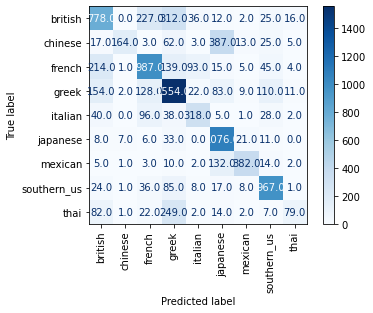

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


za parametre k= 20  i m= dice osetljivost je:  0.6811447251717894  a mat. konf. je:


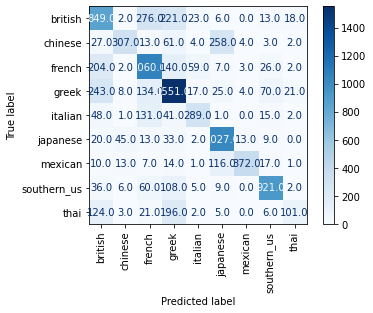

najbolja osetljivost je u iteraciji broj:  11


In [ ]:

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
acc = []
for k in [3, 7, 9, 11, 15,17,20]:
    for m in ['kulsinski', 'dice']:
        indexes = kf.split(X_tr, y_tr)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_tr)),len(np.unique(y_tr))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X_tr.iloc[train_index,:], y_tr.iloc[train_index])
            y_pred = classifier.predict(X_tr.iloc[test_index,:])
            acc_tmp.append(recall_score(y_tr.iloc[test_index], y_pred,average='micro'))
            fin_conf_mat += confusion_matrix(y_tr.iloc[test_index], y_pred, labels=y_tr.unique())
        print('za parametre k=', k, ' i m=', m, 'osetljivost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
        #print(fin_conf_mat)

        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        disp.plot(cmap="Blues", values_format='', xticks_rotation=90)  
        plt.show()
        
        acc.append(np.mean(acc_tmp))
print('najbolja osetljivost je u iteraciji broj: ', np.argmax(acc))
#ovde najbolje rezultate daje 10, dice, 67%

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


za parametre k= 30  i m= kulsinski osetljivost je:  0.660112273241135  a mat. konf. je:


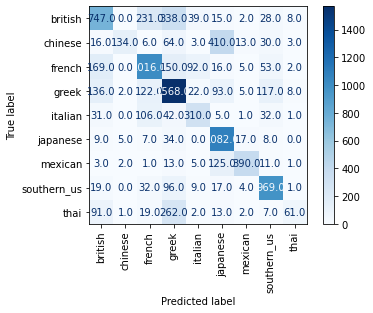

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


za parametre k= 30  i m= dice osetljivost je:  0.6817760713590086  a mat. konf. je:


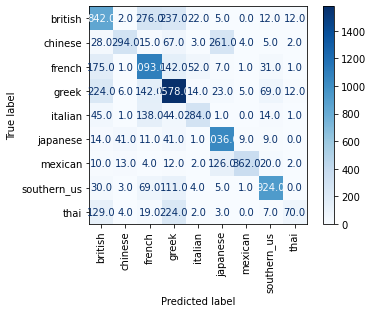

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


za parametre k= 50  i m= kulsinski osetljivost je:  0.6536967116044993  a mat. konf. je:


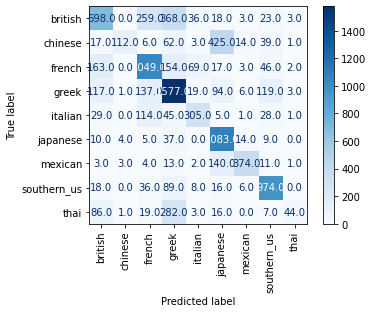

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


za parametre k= 50  i m= dice osetljivost je:  0.6738891714854637  a mat. konf. je:


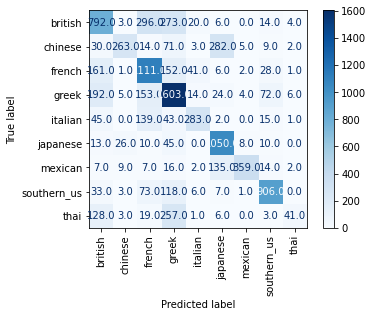

najbolja osetljivost je u iteraciji broj:  1


In [ ]:

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
acc = []
for k in [30,50]:
    for m in ['kulsinski', 'dice']:
        indexes = kf.split(X_tr, y_tr)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_tr)),len(np.unique(y_tr))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X_tr.iloc[train_index,:], y_tr.iloc[train_index])
            y_pred = classifier.predict(X_tr.iloc[test_index,:])
            acc_tmp.append(recall_score(y_tr.iloc[test_index], y_pred,average='micro'))
            fin_conf_mat += confusion_matrix(y_tr.iloc[test_index], y_pred, labels=y_tr.unique())
        print('za parametre k=', k, ' i m=', m, 'osetljivost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
        #print(fin_conf_mat)

        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        disp.plot(cmap="Blues", values_format='', xticks_rotation=90)  
        plt.show()
        
        acc.append(np.mean(acc_tmp))
print('najbolja osetljivost je u iteraciji broj: ', np.argmax(acc))


## Finalni odabrani parametri za klasifikaciju KNN su: broj suseda=17 i mterika=jaccard

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


za parametre k= 17  i m= jaccard osetljivost je:  0.6841951422810156  a mat. konf. je:


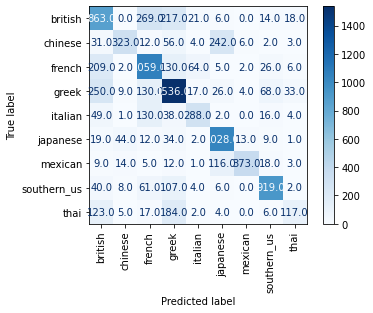

najbolja osetljivost je u iteraciji broj:  0


In [ ]:

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
acc = []
for k in [17]:
    for m in ['jaccard']:
        indexes = kf.split(X_tr, y_tr)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_tr)),len(np.unique(y_tr))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X_tr.iloc[train_index,:], y_tr.iloc[train_index])
            y_pred = classifier.predict(X_tr.iloc[test_index,:])
            acc_tmp.append(recall_score(y_tr.iloc[test_index], y_pred,average='micro'))
            fin_conf_mat += confusion_matrix(y_tr.iloc[test_index], y_pred, labels=y_tr.unique())
        print('za parametre k=', k, ' i m=', m, 'osetljivost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
        #print(fin_conf_mat)

        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        disp.plot(cmap="Blues", values_format='', xticks_rotation=90)  
        plt.show()
        
        
        acc.append(np.mean(acc_tmp))
print('najbolja osetljivost je u iteraciji broj: ', np.argmax(acc))
#za parametre k= 17  i m= jaccard osetljivost je:  0.6841951422810156  a mat. konf. je:

#matching daje losije rezultate

In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, classifier.classes_))#znatno se poboljsala osetnljivost

Za klasu  british  osetljivost je:  0.6129261363636364
Za klasu  chinese  osetljivost je:  0.47569955817378495
Za klasu  french  osetljivost je:  0.7045908183632734
Za klasu  greek  osetljivost je:  0.7409551374819102
Za klasu  italian  osetljivost je:  0.5454545454545454
Za klasu  japanese  osetljivost je:  0.8846815834767642
Za klasu  mexican  osetljivost je:  0.676950998185118
Za klasu  southern_us  osetljivost je:  0.8012205754141238
Za klasu  thai  osetljivost je:  0.2554585152838428
prosecna osetljivost je:  0.6331042075774445



Finalna obuka i testiranje klasifikatora

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[[  8   1  20   1   3   1   0  17   0]
 [  0 116   1   0   0   3   0   6   3]
 [  2   1 112   3  23   0   3  13   0]
 [  1   0   7  32  15   0   0   4   0]
 [  1   0  30   7 116   0   2  11   0]
 [  2  21   2   1   4  36   1   5   4]
 [  2   2   3   0   7   0  96  17   0]
 [  4   5  24   0  17   1  10 168   1]
 [  0  13   2   0   1   0   3   2  40]]


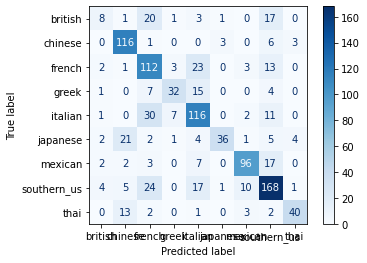

procenat pogodjenih uzoraka:  0.684957426679281
preciznost mikro:  0.684957426679281
preciznost makro:  0.6972472296928113
osetljivost mikro:  0.684957426679281
osetljivost makro:  0.6246899130156719
f mera mikro:  0.684957426679281
f mera makro:  0.6431407132097635


In [ ]:
knn = KNeighborsClassifier(n_neighbors=17, metric='jaccard')
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_te)
conf_mat = confusion_matrix(y_te, y_pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_te, y_pred=y_pred, labels=knn.classes_, cmap=plt.cm.Blues)   
plt.show()

print('procenat pogodjenih uzoraka: ', accuracy_score(y_te, y_pred))
print('preciznost mikro: ', precision_score(y_te, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_te, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_te, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_te, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_te, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_te, y_pred, average='macro'))

In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(conf_mat, knn.classes_))

Za klasu  british  osetljivost je:  0.1568627450980392
Za klasu  chinese  osetljivost je:  0.8992248062015504
Za klasu  french  osetljivost je:  0.7133757961783439
Za klasu  greek  osetljivost je:  0.5423728813559322
Za klasu  italian  osetljivost je:  0.6946107784431138
Za klasu  japanese  osetljivost je:  0.47368421052631576
Za klasu  mexican  osetljivost je:  0.7559055118110236
Za klasu  southern_us  osetljivost je:  0.7304347826086957
Za klasu  thai  osetljivost je:  0.6557377049180327
prosecna osetljivost je:  0.6246899130156719


In [ ]:
print('prosecna specificnost je: ', specificnost_po_klasi(conf_mat, knn.classes_))

Za klasu  british  specificnost je:  0.9880715705765407
Za klasu  chinese  specificnost je:  0.9536637931034483
Za klasu  french  specificnost je:  0.9011111111111111
Za klasu  greek  specificnost je:  0.9879759519038076
Za klasu  italian  specificnost je:  0.9213483146067416
Za klasu  japanese  specificnost je:  0.9949031600407747
Za klasu  mexican  specificnost je:  0.9795698924731183
Za klasu  southern_us  specificnost je:  0.909310761789601
Za klasu  thai  specificnost je:  0.9919678714859438
prosecna specificnost je:  0.9586580474545653


In [ ]:
print('prosecna preciznost je: ', preciznost_po_klasi(conf_mat, knn.classes_))
#

Za klasu  british  preciznost je:  0.4
Za klasu  chinese  preciznost je:  0.7295597484276729
Za klasu  french  preciznost je:  0.5572139303482587
Za klasu  greek  preciznost je:  0.7272727272727273
Za klasu  italian  preciznost je:  0.6236559139784946
Za klasu  japanese  preciznost je:  0.8780487804878049
Za klasu  mexican  preciznost je:  0.8347826086956521
Za klasu  southern_us  preciznost je:  0.691358024691358
Za klasu  thai  preciznost je:  0.8333333333333334
prosecna preciznost je:  0.6972472296928113
